# Team 4 (Secati) - TED Talks 

![](https://psmarketingimages.s3.amazonaws.com/blog/wp-content/uploads/2017/04/23103819/TED-Talks-for-Small-Business-and-Entrepreneurs.jpg)


## Who are we?
We are Team Secati from Coderschool ML Course. Our team consist of three members, each of us is in charge of different parts in the process of analyzing this data.
- Chau: Cleaning the Data
- Kha: Analyzing data
- Thi: Visualizing data

We thought that our analysis will assist the decision making of many media companies who want to understand about the views and rating of a successful/unpopular talk, precisely those who want to deeply study the data of TED Talk.

The analysis will be divided into five main parts
(We start from 0 because we are programmers):
* Step 0: Set up the environment
* Step 1: Read the data
* Step 2: Clean the data
* Step 3: Analyze the data
* Step 4: Apply Machine Learning Model

## What is our Data about?

These datasets contain information about all audio-video recordings of TED Talks uploaded to the official TED.com website until September 21st, 2017. The TED main dataset contains information about all talks including number of views, number of comments, descriptions, speakers and titles. The TED transcripts dataset contains the transcripts for all talks available on TED.com.

### A lot goes into researching and creating a TED Talk.
Most TED Talks are edited, lightly but carefully. TED typically remove the first few sentences of warmup chatter, and excessive ums and uhs — but they won't distort the speaker's meaning with their edit.
It takes one of their pro video editors about a full day to edit an 18-minute TED Talk.
Almost every TED Talk hosted on TED.com has full subtitles and a snazzy clickable time-coded transcript.
While some of your favorite TED Talks were shot with multiple cameras — up to nine — others are filmed very simply. Next time you watch, count the different shots.

### Understanding the data:
- comments (int): The number of first level comments made on the talk
- description (str): A blurb of what the talk is about
- duration (int): The duration of the talk in seconds
- event (str): The TED/TEDx event where the talk took place
- film_date (int): The Unix timestamp of the filming
- languages (int): The number of languages in which the talk is available
- main_speaker (str): The first named speaker of the talk
- name (str): The official name of the TED Talk. Includes the title and the speaker.
- num_speaker (int): The number of speakers in the talk
- published_date (int): The Unix timestamp for the publication of the talk on TED.com
- ratings (str): A stringified dictionary of the various ratings given to the - talk (inspiring, fascinating, jaw dropping, etc.)
- related_talks (str): A list of dictionaries of recommended talks to watch next
- speaker_occupation (str): The occupation of the main speaker
- tags (str): The themes associated with the talk
- title (str): The title of the talk
- url (str): The URL of the talk
- views (int): The number of views on the talk

### Who is our Audience?


1. Media Head
2. TED-talk Organizers
3. Event Organizers


## Usage for the Audience
- Create/Explore more topics that haven't been covered yet on Ted talks
- Understand how to increase number of View, Comments, Ratings of Ted talks
- Understand which place/time/duration/event to organize most popular Ted talks
- Prediction of the view for future Ted talks (Understand how much investment should be spend on)

## Big questions:



*   What are the most popular talks?

*   Which factors need to be considered to have a successful talk?




## Expectation :
+ Build a content recommendation for TED
  - Create a vector representation of each description
  - Create a similarity matrix for the vector representation created above
  - For each talk, based on some similarity metric, select 4 most similar talks

+ View Prediction:

  We measure our results based on views, comments, and positive ratings.

  - Views: What gets people to hear an idea?
  - Positive Ratings: What makes people react positively to the idea?
  - Comments: What kinds of ideas produce discussions?
  - We can also apply One-Hot-Encoding on the categorical attributes and get the data ready for training machine learning models. Then we print out the dimensions of the final dataset.


+ Data analysis ideas:
  - What are the most viewed talks?
  - Which event has the most talks?
  - Which talks provoke the most online discussion?
  - Which are the most viewed topics?
  - Which descriptors are most rated by the viewers?
  - Which video have the best/worst view?
  - Which video have the best/worst rating?
  - Which occupations deliver the funniest TED talks on average?
  - Positive/Negative index affect the quality of the talks?
  - Central tendencys of Views & Comments
  - Correlation between Views & Comments per talk
  - Correlation between Views & Languages per talk
  - Analyze speakers, tags, and event location using one-hot encoding

## Step 0: Setup the Environment

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import regex as re
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style("whitegrid")
pd.set_option('display.max_rows', 100)
plt.rcParams.update({'font.size': 12})

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Step 1: Read Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Create the main pandas data frame

In [ ]:
df = pd.read_csv('/content/drive/My Drive/FTMLE - Tonga/Week_3/assignments/datasets/04-ted-talks/ted.csv')

### Overview

In [ ]:
# Show a summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null int64
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(7), object(10)
memory usage: 338.8+ KB


In [ ]:
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [ ]:
df.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

In [ ]:
df.shape

(2550, 17)

## Step 2: Cleaning the data

In [ ]:
# Firstly take a brief glance into the data frame

df.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


### Set Index

Id must be unique. So the number of unique values must be equal the number of rows. There are 2 methods to check:
``` df['column'].nunique() == df['column'].count() ``` or 
```df['column'].nunique() == df.shape[0]```

However, this data frame does not have ID column
In order to improve data searching, we always need to create indexes for data lookup purpose. 

In [ ]:
df.index = [i for i in range(0, len(df.values))]
df.index.name = 'ID'
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
ID,,,,,,,,,,,,,,,,,
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


### Check data duplication

In [ ]:
df.nunique()

comments               559
description           2550
duration              1083
event                  355
film_date              735
languages               66
main_speaker          2156
name                  2550
num_speaker              5
published_date        2490
ratings               2550
related_talks         2550
speaker_occupation    1458
tags                  2530
title                 2550
url                   2550
views                 2550
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null int64
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(7), object(10)
memory usage: 358.6+ KB


It seems that there is no dubplicate at all, we can double-check just to be sure

In [ ]:
df.drop_duplicates(subset=None, keep="first", inplace=False)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
ID,,,,,,,,,,,,,,,,,
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,1496707200,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,1505851216,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,1492992000,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,1505919737,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470
2547,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647


### Drop unnecessary columns

The URL, related_talks and name are not necessary in our analysis.

In [ ]:
df.drop(columns=['url', 'name', 'related_talks'], inplace = True)
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,num_speaker,published_date,ratings,speaker_occupation,tags,title,views
ID,,,,,,,,,,,,,,
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,12005869


### Reorder for the sake of Readability

In [ ]:
# For the reader's convenience (and my OCD)
df = df[['title', 'description', 'main_speaker', 'speaker_occupation', 'num_speaker', 'duration', 'event', 'film_date', 'published_date', 'views', 'comments', 'tags', 'languages', 'ratings']]
df.head()

,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,views,comments,tags,languages,ratings
ID,,,,,,,,,,,,,,
0,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,1140825600,1151367060,47227110,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {..."
1,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,1140825600,1151367060,3200520,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i..."
2,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,1140739200,1151367060,1636292,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i..."
3,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,1140912000,1151367060,1697550,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}..."
4,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,1140566400,1151440680,12005869,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}..."


### Handle missing data




We would start by first counting the number of missing values in each column. From the info, our expectation is 6 missing values in speaker_occupation.

In [ ]:
df.isna().sum()

title                 0
description           0
main_speaker          0
speaker_occupation    6
num_speaker           0
duration              0
event                 0
film_date             0
published_date        0
views                 0
comments              0
tags                  0
languages             0
ratings               0
dtype: int64

In machine learning, we need to handle missing values. There are many types of missing values:

1. Standard Missing Values: These are missing values that Pandas can detect.
2. Non-Standard Missing Values: Sometimes it might be the case where there’s missing values that have different formats.
3. Unexpected Missing Values: For example, if our feature is expected to be a string, but there’s a numeric type, then technically this is also a missing value.

In [ ]:
# View those missing values of speaker_occupation
df[df['speaker_occupation'].isnull()]

,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,views,comments,tags,languages,ratings
ID,,,,,,,,,,,,,,
1113,Meet the Water Canary,"After a crisis, how can we tell if water is sa...",Sonaar Luthra,NaN,1,217,TEDGlobal 2011,1310601600,1326731605,353749,145,"['TED Fellows', 'design', 'global development'...",38,"[{'id': 10, 'name': 'Inspiring', 'count': 73},..."
1192,I am a pirate,"The Pirate Party fights for transparency, anon...",Rick Falkvinge,NaN,1,1097,TEDxObserver,1331424000,1333289675,181010,122,"['Internet', 'TEDx', 'global issues', 'politic...",10,"[{'id': 8, 'name': 'Informative', 'count': 156..."
1220,Tracking our online trackers,"As you surf the Web, information is being coll...",Gary Kovacs,NaN,1,399,TED2012,1330473600,1336057219,2098639,257,"['Internet', 'advertising', 'business', 'priva...",32,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 9..."
1656,To hear this music you have to be there. Liter...,"In this lovely talk, TED Fellow Ryan Holladay ...",Ryan Holladay,NaN,1,389,TED@BCG San Francisco,1383091200,1389369735,1284510,140,"['TED Fellows', 'entertainment', 'music', 'tec...",33,"[{'id': 1, 'name': 'Beautiful', 'count': 211},..."
1911,Old books reborn as art,What do you do with an outdated encyclopedia i...,Brian Dettmer,NaN,1,366,TEDYouth 2014,1415059200,1423238442,1159937,48,"['TEDYouth', 'art', 'books', 'creativity']",34,"[{'id': 1, 'name': 'Beautiful', 'count': 361},..."
1949,The day I stood up alone,Photographer Boniface Mwangi wanted to protest...,Boniface Mwangi,NaN,1,440,TEDGlobal 2014,1413763200,1427989423,1342431,70,"['TED Fellows', 'activism', 'art', 'corruption...",33,"[{'id': 3, 'name': 'Courageous', 'count': 614}..."


In [ ]:
# fill in those missing values with a default 'Other' value
df['speaker_occupation'].fillna('Other', inplace = True)
df.isna().sum()

title                 0
description           0
main_speaker          0
speaker_occupation    0
num_speaker           0
duration              0
event                 0
film_date             0
published_date        0
views                 0
comments              0
tags                  0
languages             0
ratings               0
dtype: int64

In [ ]:
# Check again if there is any negative value
df.describe()

,num_speaker,duration,film_date,published_date,views,comments,languages
count,2550.000000,2550.000000,2.550000e+03,2.550000e+03,2.550000e+03,2550.000000,2550.000000
mean,1.028235,826.510196,1.321928e+09,1.343525e+09,1.698297e+06,191.562353,27.326275
std,0.207705,374.009138,1.197391e+08,9.464009e+07,2.498479e+06,282.315223,9.563452
min,1.000000,135.000000,7.464960e+07,1.151367e+09,5.044300e+04,2.000000,0.000000
25%,1.000000,577.000000,1.257466e+09,1.268463e+09,7.557928e+05,63.000000,23.000000
50%,1.000000,848.000000,1.333238e+09,1.340935e+09,1.124524e+06,118.000000,28.000000
75%,1.000000,1046.750000,1.412964e+09,1.423432e+09,1.700760e+06,221.750000,33.000000
max,5.000000,5256.000000,1.503792e+09,1.506092e+09,4.722711e+07,6404.000000,72.000000


### Handle errors

In [ ]:
df.sample(10)

,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,views,comments,tags,languages,ratings
ID,,,,,,,,,,,,,,
1031,We can recycle plastic,Less than 10% of plastic trash is recycled -- ...,Mike Biddle,Plastics recycler,1,658,TEDGlobal 2011,1310601600,1317913803,975365,316,"['business', 'global issues', 'green', 'plasti...",39,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 1..."
1969,The case for engineering our food,Pamela Ronald studies the genes that make plan...,Pamela Ronald,Plant geneticist,1,1069,TED2015,1426636800,1430747997,1512972,486,"['agriculture', 'food', 'global issues', 'sust...",24,"[{'id': 8, 'name': 'Informative', 'count': 547..."
1138,Where are the baby dinosaurs?,"In a spellbinding talk, paleontologist Jack Ho...",Jack Horner,Dinosaur digger,1,1103,TEDxVancouver,1320969600,1328803198,1063288,78,"['TEDx', 'animals', 'biology', 'dinosaurs', 'h...",28,"[{'id': 8, 'name': 'Informative', 'count': 749..."
290,Life in the deep oceans,With vibrant video clips captured by submarine...,David Gallo,Oceanographer,1,800,TED1998,888624000,1221094800,996736,66,"['animals', 'geology', 'life', 'oceans', 'scie...",25,"[{'id': 10, 'name': 'Inspiring', 'count': 155}..."
3,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,1140912000,1151367060,1697550,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}..."
2504,How your brain decides what is beautiful,Anjan Chatterjee uses tools from evolutionary ...,Anjan Chatterjee,Cognitive neuroscientist,1,887,TEDMED 2016,1480464000,1502203237,1436714,18,"['TEDMED', 'beauty', 'brain', 'cognitive scien...",11,"[{'id': 24, 'name': 'Persuasive', 'count': 39}..."
1602,We need a heroic narrative for death,Amanda Bennett and her husband were passionate...,Amanda Bennett,Journalist,1,924,TEDMED 2013,1366243200,1381849202,986726,124,"['culture', 'death', 'health care', 'life']",24,"[{'id': 10, 'name': 'Inspiring', 'count': 214}..."
2362,What happens when you have a disease doctors c...,"Five years ago, TED Fellow Jennifer Brea becam...",Jennifer Brea,Filmmaker,1,1027,TEDSummit,1466985600,1484669356,1406574,266,"['Gender equality', 'TED Fellows', 'activism',...",31,"[{'id': 3, 'name': 'Courageous', 'count': 1027..."
28,"Choice, happiness and spaghetti sauce","""Tipping Point"" author Malcolm Gladwell gets i...",Malcolm Gladwell,Writer,1,1050,TED2004,1077753600,1158624660,7023562,355,"['business', 'choice', 'consumerism', 'culture...",37,"[{'id': 7, 'name': 'Funny', 'count': 1668}, {'..."


In [ ]:
df[df['languages'] == 0]

,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,views,comments,tags,languages,ratings
ID,,,,,,,,,,,,,,
58,"A dance of ""Symbiosis""","Two Pilobolus dancers perform ""Symbiosis."" Doe...",Pilobolus,Dance company,1,825,TED2005,1109289600,1170979860,3051507,222,"['dance', 'entertainment', 'nature', 'performa...",0,"[{'id': 1, 'name': 'Beautiful', 'count': 1810}..."
115,"A string quartet plays ""Blue Room""",The avant-garde string quartet Ethel performs ...,Ethel,String quartet,1,214,TED2006,1138838400,1182184140,384641,27,"['cello', 'collaboration', 'culture', 'enterta...",0,"[{'id': 1, 'name': 'Beautiful', 'count': 216},..."
135,"""Woza""",After Vusi Mahlasela's 3-song set at TEDGlobal...,Vusi Mahlasela,"Musician, activist",1,299,TEDGlobal 2007,1181260800,1187695440,416603,36,"['Africa', 'entertainment', 'guitar', 'live mu...",0,"[{'id': 8, 'name': 'Informative', 'count': 4},..."
209,"""M'Bifo""","Rokia Traore sings the moving ""M'Bifo,"" accomp...",Rokia Traore,Singer-songwriter,1,419,TEDGlobal 2007,1181088000,1206580680,294936,67,"['Africa', 'entertainment', 'guitar', 'live mu...",0,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 5..."
237,"""Kounandi""","Singer-songwriter Rokia Traore performs ""Kouna...",Rokia Traore,Singer-songwriter,1,386,TEDGlobal 2007,1181088000,1212627600,82488,43,"['Africa', 'guitar', 'live music', 'music', 's...",0,"[{'id': 22, 'name': 'Fascinating', 'count': 84..."
249,"A performance with breath, music, passion",Composer Sxip Shirey makes music from the simp...,Sxip Shirey + Rachelle Garniez,Musician,2,186,TED2008,1202774400,1214787600,217663,50,"['entertainment', 'live music', 'music']",0,"[{'id': 9, 'name': 'Ingenious', 'count': 44}, ..."
399,Piano jazz that rocks,"Eric Lewis, an astonishingly talented crossove...",Eric Lewis,Pianist,1,636,TED2009,1233878400,1236301200,697257,194,"['entertainment', 'innovation', 'invention', '...",0,"[{'id': 21, 'name': 'Unconvincing', 'count': 8..."
446,Chaos and harmony on piano,Eric Lewis explores the piano's expressive pow...,Eric Lewis,Pianist,1,294,TED2009,1233792000,1242090000,391427,138,"['art', 'entertainment', 'live music', 'music'...",0,"[{'id': 26, 'name': 'Obnoxious', 'count': 84},..."
474,An electrifying organ performance,Organ virtuoso Qi Zhang plays her electric ren...,Qi Zhang,Organist,1,185,TEDxUSC,1237766400,1245401400,803691,135,"['TEDx', 'china', 'music', 'performance', 'pia...",0,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3..."


We notice that ```languages``` appeared to have a value of 0. This is okay because these are performance. We can keep them.

Next, we also want to check the occupation of those speakers since we noticed that there are some regular expressions used.

In [ ]:
df['speaker_occupation'].unique()

array(['Author/educator', 'Climate advocate', 'Technology columnist', ...,
       'Historian, philosopher', 'Astrobiologist', ' Robotics engineer'],
      dtype=object)

In [ ]:
# Lowercase all job to make it case-insensitive
df['speaker_occupation'] = df['speaker_occupation'].str.lower()
df['speaker_occupation'].head()

ID
0                         author/educator
1                        climate advocate
2                    technology columnist
3      activist for environmental justice
4    global health expert; data visionary
Name: speaker_occupation, dtype: object

In [ ]:
# Find all the errors in our speaker_occupation.
lst = list(df['speaker_occupation'].values.flatten())
regex = r'[^\w\s\,]'
char_list = []
job_list = []
for job in lst:
  for char in re.findall(regex,job): 
    char_list.append(char)
    job_list.append(job)
set(char_list)

{"'", '(', ')', '+', '-', '.', '/', ';', '\xad', '’', '\ufeff'}

In [ ]:
# Find all the strings that contains those errors
# total 169 strings
job_list

['author/educator',
 'global health expert; data visionary',
 'life coach; expert in leadership psychology',
 'co-founder, architecture for humanity',
 'human-computer interface designer',
 'blogger; cofounder, six apart',
 'psychologist; happiness expert',
 'president-elect of afghanistan',
 'mathematician; statistician',
 'primatologist; environmentalist',
 'designer; creative director, ideo',
 'experimental audio-visual artist',
 'singer/songwriter',
 'cellist; singer-songwriter',
 'cellist; singer-songwriter',
 'singer/songwriter',
 'singer/songwriter',
 'singer/songwriter',
 'interaction designer; software developer',
 "general manager of microsoft's virtual earth",
 'global health expert; data visionary',
 'assumption-busting economist',
 'singer/songwriter',
 'singer-songwriter',
 'human-computer interaction researcher',
 'ceo, public radio international (pri)',
 'ceo, public radio international (pri)',
 'singer-songwriter',
 'singer/songwriter',
 'singer/songwriter',
 'close-up

However we noticed that some regex is needed in certain cases such as '9/11 mothers', 'co-founder', etc.
Therefore we must analyze case-by-case and find specific strings that need converting.

In [ ]:
wrong_job = ['author/educator',
'global health expert; data visionary',
'life coach; expert in leadership psychology',
'blogger; cofounder, six apart',
'psychologist; happiness expert',
'mathematician; statistician'
'primatologist; environmentalist',
'designer; creative director, ideo',
'singer/songwriter',
'cellist; singer-songwriter',
'interaction designer; software developer',
'singer-songwriter',
'ceo, public radio international (pri)',
'primatologist; environmentalist',
'psychologist; happiness expert',
'activist, singer-songwriter',
"berkeley bionics' ceo",
'executive chair, ford motor co.',
'neuroscience phd student + writer',
'satellite archaeologist + ted prize winner',
'author/illustrator',
'entrepreneur, animator, philanthropist ...',
'former u.s. representative and nasa astronaut; survivors',
'vagabond photojournalist + conceptual artist',
'architect + ecotourism specialist',
'science historian + writer',
'photographer + storyteller',
'comedian + designer',
'photographer + visual artist',
'vagabond photojournalist + conceptual artist',
'chaplain + author',
'mother + als advocate',
'attorney + privacy advocate',
'graffiti artist + activist',
'entrepreneur + educator',
'women’s rights activist and entrepreneur',
'director/choreographer, dancer',
'marine biologist, explorer-photographer',
'human-computer interaction researcher and designer',
'big data techno-\xadoptimist and internist',
'ceo and co-founder, irelaunch',
'writer, activist and legal analyst\ufeff',
'physician and men’s health advocate',
'satellite archaeologist + ted prize winner',
'bioelectronics innovator\ufeff',
'satellite archaeologist + ted prize winner',
"tv journalist, women's empowerment advocate"]
len(wrong_job)

46

In [ ]:
# Replace all unwanted characters
right_job = [re.sub(r'\ufeff|\.\.\.', '', job) for job in wrong_job]
right_job = [re.sub(r'(\s\+|\sand|;)', ',', job) for job in right_job]
right_job = [re.sub(r'(\/|-)', ', ', job) for job in right_job]
right_job

['author, educator',
 'global health expert, data visionary',
 'life coach, expert in leadership psychology',
 'blogger, cofounder, six apart',
 'psychologist, happiness expert',
 'mathematician, statisticianprimatologist, environmentalist',
 'designer, creative director, ideo',
 'singer, songwriter',
 'cellist, singer, songwriter',
 'interaction designer, software developer',
 'singer, songwriter',
 'ceo, public radio international (pri)',
 'primatologist, environmentalist',
 'psychologist, happiness expert',
 'activist, singer, songwriter',
 "berkeley bionics' ceo",
 'executive chair, ford motor co.',
 'neuroscience phd student, writer',
 'satellite archaeologist, ted prize winner',
 'author, illustrator',
 'entrepreneur, animator, philanthropist ',
 'former u.s. representative, nasa astronaut, survivors',
 'vagabond photojournalist, conceptual artist',
 'architect, ecotourism specialist',
 'science historian, writer',
 'photographer, storyteller',
 'comedian, designer',
 'photograph

In [ ]:
# Hard code the result again for right job
right_job = ['author, educator',
 'global health expert, data visionary',
 'life coach, expert in leadership psychology',
 'blogger, cofounder, six apart',
 'psychologist, happiness expert',
 'mathematician, statisticianprimatologist, environmentalist',
 'designer, creative director, ideo',
 'singer, songwriter',
 'cellist, singer, songwriter',
 'interaction designer, software developer',
 'singer, songwriter',
 'ceo',
 'primatologist, environmentalist',
 'psychologist, happiness expert',
 'activist, singer, songwriter',
 'ceo',
 'executive chair',
 'neuroscience phd student, writer',
 'satellite archaeologist, ted prize winner',
 'author, illustrator',
 'entrepreneur, animator, philanthropist ',
 'former u.s. representative, nasa astronaut, survivors',
 'vagabond photojournalist, conceptual artist',
 'architect, ecotourism specialist',
 'science historian, writer',
 'photographer, storyteller',
 'comedian, designer',
 'photographer, visual artist',
 'vagabond photojournalist, conceptual artist',
 'chaplain, author',
 'mother, als advocate',
 'attorney, privacy advocate',
 'graffiti artist, activist',
 'entrepreneur, educator',
 'women’s rights activist, entrepreneur',
 'director, choreographer, dancer',
 'marine biologist, explorer, photographer',
 'human, computer interaction researcher, designer',
 'big data techno-adoptimist, internist',
 'ceo, co-founder',
 'writer, activist, legal analyst',
 'physician, men’s health advocate',
 'satellite archaeologist, ted-prize winner',
 'bioelectronics innovator',
 'satellite archaeologist, ted-prize winner',
 "tv-journalist, women's empowerment advocate"]

for w, r in zip(wrong_job, right_job):
  df['speaker_occupation'].replace(w, r, inplace= True)
df['speaker_occupation'].unique()

array(['author, educator', 'climate advocate', 'technology columnist',
       ..., 'historian, philosopher', 'astrobiologist',
       ' robotics engineer'], dtype=object)

Lastly, we check the number of unique event names then list all of them.

In [ ]:
df['event'].unique()

array(['TED2006', 'TED2004', 'TED2005', 'TEDGlobal 2005', 'TEDSalon 2006',
       'TED2003', 'TED2007', 'TED2002', 'TEDGlobal 2007',
       'TEDSalon 2007 Hot Science', 'Skoll World Forum 2007', 'TED2008',
       'TED1984', 'TED1990', 'DLD 2007', 'EG 2007', 'TED1998',
       'LIFT 2007', 'TED Prize Wish', 'TEDSalon 2009 Compassion',
       'Chautauqua Institution', 'Serious Play 2008', 'Taste3 2008',
       'TED2001', 'TED in the Field', 'TED2009', 'EG 2008',
       'Elizabeth G. Anderson School', 'TEDxUSC', 'TED@State',
       'TEDGlobal 2009', 'TEDxKC', 'TEDIndia 2009',
       'TEDSalon London 2009', 'Justice with Michael Sandel',
       'Business Innovation Factory', 'TEDxTC',
       'Carnegie Mellon University', 'Stanford University',
       'AORN Congress', 'University of California', 'TEDMED 2009',
       'Royal Institution', 'Bowery Poetry Club', 'TEDxSMU',
       'Harvard University', 'TEDxBoston 2009', 'TEDxBerlin', 'TED2010',
       'TEDxAmsterdam', 'World Science Festival', 

In [ ]:
df['event'].value_counts()

TED2014                   84
TED2009                   83
TED2016                   77
TED2013                   77
TED2015                   75
                          ..
Handheld Learning          1
TEDxABQ                    1
TEDxConcordiaUPortland     1
TEDxWitsUniversity         1
TEDxMtHood                 1
Name: event, Length: 355, dtype: int64

The dataset has 355 unique event names but from the looks of it, lots of these names can be categorised together as they are quite similar. 

By understanding what these events' main focus, we then can break down the event names in the following 12 categories, each consisting of at least 5 samples:


1. TED19: TED talks dated back in the 1900s
2. TED20: TED talks in the 2000s
3. TEDx: The TEDx program lets individuals, organizations and communities worldwide hold local, independent TED-like events. To date, more than 13,000 TEDx events have been held in 150 countries.
4. TEDGlobal: TEDGlobal is a conference that celebrates human ingenuity by exploring ideas, innovation and creativity from all around the world with different themes each year.
5. TEDSalon: TED Salons welcome an intimate audience for an afternoon or evening of highly-curated TED Talks revolving around a globally relevant theme. A condensed version of a TED flagship conference, they are distinct in their brevity, opportunities for conversation, and heightened interaction between the speaker and audience.
6. TEDWomen: TEDWomen is a three-day conference about the power of women and girls to be creators and change-makers.
7. TED@BCG: TED@BCG is a multi-year collaboration with Boston Consulting Group that has been held in Mumbai, Toronto, Milan, Paris, London, Berlin, Singapore, and San Francisco.
8. TED@: TED@ is a multi-year collaboration with different partners with touch points across the TED ecosystem.
9. TEDYouth: TEDYouth is a day-long event for middle and high school students, with live speakers, hands-on activities and great conversations. Scientists, designers, technologists, explorers, artists, performers (and more!) share short talks on what they do best, serving both as a source of knowledge and inspiration for youth around the globe.
10. TEDMED: TEDMED convenes and curates extraordinary people and ideas from all disciplines both inside and outside of medicine in pursuit of unexpected connections that accelerate innovation in health and medicine. Best known for their annual event, TEDMED is a year-round global community. 
11. TED : Other TED Talks, each focusing on a specific topic. These TED talks includes those filmed at their flagship TED conferences.
12. Other: These talks don’t come from TED or any of their partner conferences. These talks come from all over the Web.



In [ ]:
def replace_event_cat(event):

  # Create a list of Regex to match the 355 events in the column event. 
  regex_list = ['TED19', 'TED20', 'TEDx', 'TEDGlobal', 'TEDSalon', 'TEDWomen', 'TED@BCG', 'TED@', 'TEDYouth', 'TEDMED', 'TED']

  # Replace all values in the event that match regex with the same regex name.
  for reg in regex_list:
    if re.match(reg, event):
      return reg

In [ ]:
# Then replace accordingly with the same index in column event_category, if there is no match return None.
df['event_category'] = df['event'].apply(replace_event_cat)

df['event_category'].unique()

array(['TED20', 'TEDGlobal', 'TEDSalon', None, 'TED19', 'TED', 'TEDx',
       'TED@', 'TEDMED', 'TEDWomen', 'TEDYouth', 'TED@BCG'], dtype=object)

In [ ]:
# We need to replace all None value to Other:
df['event_category'].fillna('Other', inplace = True)
df['event_category'].value_counts()

TED20        969
TEDx         471
TEDGlobal    463
TED          178
Other        111
TEDWomen      96
TEDSalon      79
TEDMED        68
TED@          60
TED@BCG       27
TEDYouth      19
TED19          9
Name: event_category, dtype: int64

### Handle Speaker columns




Some speaker's name contains special characters that make it hard for our analysis. We will look into each name and find those unwanted characters.

In [ ]:
df['main_speaker'].unique()

array(['Ken Robinson', 'Al Gore', 'David Pogue', ..., 'Radhika Nagpal',
       'Theo E.J. Wilson', 'Karoliina Korppoo'], dtype=object)

In [ ]:
speaker_mistake = list(df['main_speaker'].values.flatten())
regex = r'[^\w\s\,]'
char_list = []
speaker_list = []
for speaker in speaker_mistake:
  for char in re.findall(regex,speaker): 
    char_list.append(char)
    speaker_list.append(speaker)
speaker_list

['Joshua Prince-Ramus',
 'Richard St. John',
 'E.O. Wilson',
 'E.O. Wilson',
 'Susan Savage-Rumbaugh',
 'Sergey Brin + Larry Page',
 'Ngozi Okonjo-Iweala',
 'Ngozi Okonjo-Iweala',
 'Eleni Gabre-Madhin',
 'Murray Gell-Mann',
 'J.J. Abrams',
 'J.J. Abrams',
 'Jill Sobule + Julia Sweeney',
 'Roy Gould + Curtis Wong',
 'Tod Machover + Dan Ellsey',
 'Murray Gell-Mann',
 'Sxip Shirey + Rachelle Garniez',
 'Marisa Fick-Jordan',
 'Bruno Bowden + Rufus Cappadocia',
 'John Q. Walker',
 'David S. Rose',
 'Zach Kaplan + Keith Schacht',
 'Jennifer 8. Lee',
 'Pattie Maes + Pranav Mistry',
 'Tim Berners-Lee',
 'C.K. Williams',
 'C.K. Williams',
 'Christopher C. Deam',
 'P.W. Singer',
 'P.W. Singer',
 'JoAnn Kuchera-Morin',
 'Yann Arthus-Bertrand',
 'Richard St. John',
 'Fields Wicker-Miurin',
 'Joshua Prince-Ramus',
 'Philip K. Howard',
 'Tim Berners-Lee',
 "Gary Lauder's new traffic sign",
 'Sharmeen Obaid-Chinoy',
 'Christopher "moot" Poole"',
 'Christopher "moot" Poole"',
 'Christopher "moot" Pool

We think that it is safe to keep names with '-' because it is the name of the speakers. However, we will have to find all names that are connected by '+'.

In [ ]:
df[df['main_speaker'].str.contains('\+', regex = True)]['main_speaker'].unique()

array([], dtype=object)

Next we will replace all ' +' with ',' for cleaner data.

In [ ]:
df[df['main_speaker'].str.contains('\+', regex = True)]['main_speaker'].str.replace('\s\+', ',')

Series([], Name: main_speaker, dtype: object)

In [ ]:
# This is a simple function to replace
def replace_speaker(s):

    if ' +' in s:
        s = s.replace(' +', ',')
    return s

# Test it out
replace_speaker("Beau Lotto + Amy O'Toole")

df['main_speaker'] = df['main_speaker'].apply(replace_speaker)

### Handle Datetime columns : Reformatting for better analysis


In [ ]:
df.sample()

,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,views,comments,tags,languages,ratings,event_category
ID,,,,,,,,,,,,,,,
342,"What I'm worried about, what I'm excited about",Technologist and futurist Bill Joy talks about...,Bill Joy,technologist and futurist,1,1142,TED2006,1138838400,1227514620,487378,36,"['business', 'future', 'health', 'science', 't...",23,"[{'id': 21, 'name': 'Unconvincing', 'count': 4...",TED20


It is noticed that this data is using Unix time for ```film_date``` and ```published_date```. Unix time is a system for describing a point in time. It is the number of seconds that have elapsed since the Unix epoch, that is the time 00:00:00 UTC on 1 January 1970, minus leap seconds. Therefore we need to convert it into Year, Month and Date.

In [ ]:
df['film_date'] = pd.to_datetime(df['film_date'], unit='s')
df['film_date'].head(10)

ID
0   2006-02-25
1   2006-02-25
2   2006-02-24
3   2006-02-26
4   2006-02-22
5   2006-02-02
6   2006-02-24
7   2006-02-23
8   2006-02-02
9   2006-02-25
Name: film_date, dtype: datetime64[ns]

In [ ]:
df['published_date'] = pd.to_datetime(df['published_date'],unit='s').dt.to_period('D')
df['published_date'].head(10)

### Handle Tags column

This is one of the most important features as it will tell us what people like to hear about when they watch a TED talk.

We first will look at how the tags are packaged.

In [ ]:
df.loc[1,'tags']

"['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology']"

Each tag contains a list of string, where each string refers to the keyword or term assigned to a piece of talk. The main problem is that it looks like a list of strings, but infact this is purely string of characters.
We will first have to destring the list so that we can work with the data.

In [ ]:
# Change string into list of string
df['tags'] = df['tags'].apply(lambda x: eval(str(x)))
df['tags'] [1]

Now the tags column is ready for analysis since it is no longer a string of separated characters mixed with regex. We use a package from Gensim known as KeyedVectors. This package is a deep learning neural network that learns the context of words and converts them to vector representations. This is extremely useful as it will allow us to see which tags are related without having to do the dirty work ourselves.


In [ ]:
# from gensim.models import KeyedVectors
# #Load Google's vectors
# model = KeyedVectors.load_word2vec_format("/content/GoogleNews-vectors-negative300.bin.gz", binary=True)

In [ ]:
# import wordcloud
# from matplotlib import pyplot as plt
# from IPython.display import display

To use KeyedVectors, we have to give it words that it has in its dictionary. Because it is a collection of single words, we cannot have any phrases or hyphenated words. We remove those tags as well as a few tags that are not contained in Google's vocabulary.

In [ ]:
tag_list = {}
tag_name = []
def count_tag(row):
  tags = row['tags']

  for tag in tags:
    if tag not in tag_list.keys():
      tag_name.append(tag)
      tag_list[tag] = 1
    tag_list[tag] += 1

df.apply(count_tag, axis = 1)
tag_list

{' ': 19488,
 '"': 13,
 "'": 38303,
 ',': 16605,
 '-': 137,
 '3': 4,
 'A': 341,
 'B': 136,
 'C': 40,
 'D': 876,
 'E': 884,
 'F': 152,
 'G': 87,
 'H': 17,
 'I': 168,
 'J': 11,
 'L': 15,
 'M': 80,
 'N': 110,
 'P': 77,
 'R': 15,
 'S': 181,
 'T': 858,
 'U': 31,
 'V': 19,
 'Y': 52,
 '[': 2551,
 ']': 2551,
 'a': 10378,
 'b': 2556,
 'c': 9865,
 'd': 2979,
 'e': 17838,
 'f': 1219,
 'g': 4963,
 'h': 4537,
 'i': 15639,
 'j': 55,
 'k': 289,
 'l': 8585,
 'm': 5155,
 'n': 13379,
 'o': 12159,
 'p': 3024,
 'q': 141,
 'r': 8912,
 's': 10741,
 't': 11909,
 'u': 5684,
 'v': 2083,
 'w': 969,
 'x': 647,
 'y': 4348,
 'z': 138,
 'ñ': 13}

In [ ]:
#Extract all tags from list of lists
tag_name = pd.Series(tag_name)

In [ ]:
#Only take unique tags
unique_tag_list = list(tag_name.unique())
unique_tag_list

['children',
 'creativity',
 'culture',
 'dance',
 'education',
 'parenting',
 'teaching',
 'alternative energy',
 'cars',
 'climate change',
 'environment',
 'global issues',
 'science',
 'sustainability',
 'technology',
 'computers',
 'entertainment',
 'interface design',
 'media',
 'music',
 'performance',
 'simplicity',
 'software',
 'MacArthur grant',
 'activism',
 'business',
 'cities',
 'green',
 'inequality',
 'politics',
 'pollution',
 'Africa',
 'Asia',
 'Google',
 'demo',
 'economics',
 'global development',
 'health',
 'math',
 'statistics',
 'visualizations',
 'goal-setting',
 'motivation',
 'potential',
 'psychology',
 'Christianity',
 'God',
 'atheism',
 'comedy',
 'humor',
 'religion',
 'storytelling',
 'architecture',
 'collaboration',
 'design',
 'library',
 'TED Brain Trust',
 'brain',
 'cognitive science',
 'consciousness',
 'evolution',
 'philosophy',
 'happiness',
 'leadership',
 'philanthropy',
 'disaster relief',
 'invention',
 'open-source',
 'TED Prize',
 'art

In [ ]:
#Remove phrases and hyphenated words
tag_clean_list = [ x for x in tag_name if " " not in x ]
tag_clean_list = [ x for x in tag_clean_list if "-" not in x ]

In [ ]:
tag_clean_list

['children',
 'creativity',
 'culture',
 'dance',
 'education',
 'parenting',
 'teaching',
 'cars',
 'environment',
 'science',
 'sustainability',
 'technology',
 'computers',
 'entertainment',
 'media',
 'music',
 'performance',
 'simplicity',
 'software',
 'activism',
 'business',
 'cities',
 'green',
 'inequality',
 'politics',
 'pollution',
 'Africa',
 'Asia',
 'Google',
 'demo',
 'economics',
 'health',
 'math',
 'statistics',
 'visualizations',
 'motivation',
 'potential',
 'psychology',
 'Christianity',
 'God',
 'atheism',
 'comedy',
 'humor',
 'religion',
 'storytelling',
 'architecture',
 'collaboration',
 'design',
 'library',
 'brain',
 'consciousness',
 'evolution',
 'philosophy',
 'happiness',
 'leadership',
 'philanthropy',
 'invention',
 'art',
 'film',
 'movies',
 'peace',
 'disease',
 'ebola',
 'entrepreneur',
 'violin',
 'wunderkind',
 'youth',
 'piano',
 'engineering',
 'DNA',
 'biology',
 'nature',
 'wikipedia',
 'community',
 'communication',
 'gender',
 'love',
 '

In [ ]:
#Remove anomaly words
tag_clean_list.remove('archaeology')

In [ ]:
tag_clean_list.remove('TEDYouth')
tag_clean_list.remove('deextinction')
tag_clean_list.remove('blockchain')
tag_clean_list.remove('TEDNYC')

ValueError: ignored

In [ ]:
len(tag_clean_list)

In [ ]:
# #List containing each word
# labels = []
# #List containing the vector representation of each word
# tokens = []

# #Populate lists 
# for word in tag_clean_list:
#     tokens.append(model[word])
#     labels.append(word)

# #T-SNE model for 2D representation
# tsne_model = TSNE(perplexity=50, n_components=2, init='pca', n_iter=105000, random_state=17,learning_rate=5500)
# new_values = tsne_model.fit_transform(tokens)

# #K-Means model to assign similar clusters
# kmeans = KMeans(n_clusters=15,n_init=200)
# kmeans.fit(tokens)
# clusters = kmeans.predict(tokens)

# #DataFrame we will use to plot
# df_tsne = pd.DataFrame(new_values, columns=['1st_Comp', '2nd_Comp'])
# df_tsne['Cluster'] = clusters

# sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_tsne, hue='Cluster', fit_reg=False)
# plt.title("Tag Clusters")

Since we have a general view of different tags and the frequency of each tag in TED talks, we might consider these tags as a metric of how successful a TED talk is, as some topics with specific tags seem to be favoured over others.

In order to do that, we need to 

### Handle Ratings column

We notice that the ratings column is not really well-organized and is hard to read, therefore we would like to sort it and only take ne necessary information related to our analysis.

In [ ]:
df.head()

In [ ]:
df['ratings'][1]

In [ ]:
# # Turns stringified dictionary into python dictionary
# df['ratings'] = df['ratings'].apply(lambda x: eval(str(x)))

# # Take the values of 'name' and 'count' and make a dictionary for each row
# def count_frequency(dict):
#   rating_count = {}
#   for i in dict:
#     if i['name'] in rating_count:
#       rating_count[i['name']] += i['count']
#     rating_count[i['name']] = i['count']
#   return rating_count

# df['ratings'] = df['ratings'].apply(count_frequency)

In [ ]:
# descriptors = ['Funny', 'Beautiful', 'Ingenious', 'Courageous', 'Longwinded', 'Confusing', 'Informative', 'Fascinating', 'Unconvincing', 'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious', 'Inspiring']
# frequency_list = []
# def parse(x):
#   for i in range(0, len(df)):
#     frequency = df['ratings'][i][x]
#     frequency_list.append(int(frequency))
#     series = pd.Series(frequency_list)
#     df[x] = series

# for rating in descriptors:
#     parse(rating)
#     frequency_list.clear()

In [ ]:
rating_cols = {}
seen = []
for i, value in df.iterrows():
  for rating in value['ratings'][:2]:
    if rating['name'] not in seen:
      seen.append(rating['name'])
      rating_cols[rating['name']] = [rating['count']]
      print('before: ', rating_cols[rating['name']])
    else:
      rating_cols[rating['name']].append(rating['count'])
      print('list:', rating['name'], rating_cols[rating['name']])

ERROR! Session/line number was not unique in database. History logging moved to new session 60
before:  [19645]
before:  [4573]
list: Funny [19645, 544]
before:  [139]
list: Funny [19645, 544, 964]
list: Courageous [139, 45]
list: Courageous [139, 45, 760]
list: Beautiful [4573, 291]
before:  [3202]
list: Funny [19645, 544, 964, 1390]
list: Funny [19645, 544, 964, 1390, 1102]
list: Courageous [139, 45, 760, 721]
list: Courageous [139, 45, 760, 721, 477]
list: Funny [19645, 544, 964, 1390, 1102, 2484]
list: Ingenious [3202, 195]
list: Beautiful [4573, 291, 98]
list: Courageous [139, 45, 760, 721, 477, 562]
before:  [70]
before:  [838]
list: Beautiful [4573, 291, 98, 767]
list: Courageous [139, 45, 760, 721, 477, 562, 169]
list: Ingenious [3202, 195, 258]
list: Beautiful [4573, 291, 98, 767, 70]
list: Courageous [139, 45, 760, 721, 477, 562, 169, 96]
before:  [188]
list: Courageous [139, 45, 760, 721, 477, 562, 169, 96, 86]
list: Ingenious [3202, 195, 258, 1014]
list: Beautiful [4573, 29

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
rating_cols.keys()

dict_keys(['Funny', 'Beautiful', 'Ingenious', 'Courageous', 'Longwinded', 'Confusing', 'Informative', 'Fascinating', 'Unconvincing', 'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious', 'Inspiring'])

In [ ]:
rating_cols.values()

dict_values([[19645, 544, 964, 59, 1390, 1102, 2484, 9, 60, 26, 18, 5, 3, 104, 14, 190, 24, 21, 49, 19, 12, 2799, 106, 780, 109, 131, 127, 485, 1668, 1728, 1526, 13, 215, 1, 5, 1, 9, 63, 80, 26, 8, 1, 103, 2751, 18, 11, 5, 2966, 949, 54, 3, 16, 68, 5, 47, 342, 20, 11, 21, 149, 3, 11, 199, 11, 44, 3, 36, 785, 306, 319, 15, 35, 468, 12, 7, 97, 11, 31, 507, 15, 14, 3, 13, 272, 18, 159, 259, 2, 219, 122, 75, 130, 169, 5, 1, 11, 1203, 600, 58, 11, 23, 94, 275, 1006, 43, 10, 256, 330, 70, 4, 20, 342, 330, 3, 384, 3, 3, 1021, 32, 93, 23, 50, 7, 91, 2460, 65, 440, 29, 11, 36, 1, 5, 140, 7, 17, 17, 40, 26, 965, 52, 214, 100, 39, 3, 33, 643, 244, 111, 47, 307, 230, 33, 263, 26, 673, 1, 95, 400, 254, 34, 30, 30, 2, 51, 73, 855, 296, 40, 2152, 38, 13, 1210, 1302, 1452, 41, 1512, 815, 9, 100, 6, 22, 167, 604, 128, 37, 6, 140, 92, 67, 73, 129, 202, 10, 433, 1637, 0, 89, 6, 20, 9, 24, 966, 40, 480, 15, 7, 19, 30, 1243, 0, 28, 8, 1, 69, 58, 132, 1, 7, 0, 560, 58, 237, 143, 10, 18, 8, 80, 643, 135, 194

In [ ]:
seen

['Funny',
 'Beautiful',
 'Ingenious',
 'Courageous',
 'Longwinded',
 'Confusing',
 'Informative',
 'Fascinating',
 'Unconvincing',
 'Persuasive',
 'Jaw-dropping',
 'OK',
 'Obnoxious',
 'Inspiring']

In [ ]:
# Convert the result to dataframe
rating_df = pd.DataFrame(rating_cols)

In [ ]:
rating_df

,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
0,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924
1,544,58,56,139,113,62,443,132,258,268,116,203,131,413
2,964,60,183,45,78,27,395,166,104,230,54,146,142,230
3,59,291,105,760,53,32,380,132,36,460,230,85,35,1070
4,1390,942,3202,318,110,72,5433,4606,67,2542,3736,248,61,2893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,1,21,22,24,3,2,33,8,12,24,14,0,1,27
2546,20,4,6,2,0,0,38,32,1,7,8,13,0,20
2547,1,14,19,2,0,5,32,24,1,3,1,4,0,30
2548,63,21,37,107,3,1,75,39,6,65,7,5,7,147


In [ ]:
df.head()

,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,views,comments,tags,languages,ratings,event_category
ID,,,,,,,,,,,,,,,
0,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,"author, educator",1,1164,TED2006,2006-02-25,2006-06-27,47227110,4553,"[children, creativity, culture, dance, educati...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",TED20
1,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,climate advocate,1,977,TED2006,2006-02-25,2006-06-27,3200520,265,"[alternative energy, cars, climate change, cul...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",TED20
2,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,technology columnist,1,1286,TED2006,2006-02-24,2006-06-27,1636292,124,"[computers, entertainment, interface design, m...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",TED20
3,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,activist for environmental justice,1,1116,TED2006,2006-02-26,2006-06-27,1697550,200,"[MacArthur grant, activism, business, cities, ...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",TED20
4,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,"global health expert, data visionary",1,1190,TED2006,2006-02-22,2006-06-27,12005869,593,"[Africa, Asia, Google, demo, economics, global...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",TED20


In [ ]:
# Concat our new cols with the original DF
rating_df['title'] = df['title'].values

In [ ]:
rating_df = rating_df[['title', 'Funny', 'Beautiful', 'Ingenious', 'Courageous', 'Longwinded', 'Confusing', 'Informative', 'Fascinating', 'Unconvincing', 'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious', 'Inspiring']]

In [ ]:
rating_df

,title,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
0,Do schools kill creativity?,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924
1,Averting the climate crisis,544,58,56,139,113,62,443,132,258,268,116,203,131,413
2,Simplicity sells,964,60,183,45,78,27,395,166,104,230,54,146,142,230
3,Greening the ghetto,59,291,105,760,53,32,380,132,36,460,230,85,35,1070
4,The best stats you've ever seen,1390,942,3202,318,110,72,5433,4606,67,2542,3736,248,61,2893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,What we're missing in the debate about immigra...,1,21,22,24,3,2,33,8,12,24,14,0,1,27
2546,The most Martian place on Earth,20,4,6,2,0,0,38,32,1,7,8,13,0,20
2547,What intelligent machines can learn from a sch...,1,14,19,2,0,5,32,24,1,3,1,4,0,30
2548,A black man goes undercover in the alt-right,63,21,37,107,3,1,75,39,6,65,7,5,7,147


In [ ]:
df.head()

ERROR! Session/line number was not unique in

,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,views,comments,tags,languages,ratings,event_category,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,"author, educator",1,1164,TED2006,2006-02-25,2006-06-27,47227110,4553,"[children, creativity, culture, dance, educati...",60,"{'Funny': 19645, 'Beautiful': 4573, 'Ingenious...",TED20,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924
1,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,climate advocate,1,977,TED2006,2006-02-25,2006-06-27,3200520,265,"[alternative energy, cars, climate change, cul...",43,"{'Funny': 544, 'Courageous': 139, 'Confusing':...",TED20,544,58,56,139,113,62,443,132,258,268,116,203,131,413
2,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,technology columnist,1,1286,TED2006,2006-02-24,2006-06-27,1636292,124,"[computers, entertainment, interface design, m...",26,"{'Funny': 964, 'Courageous': 45, 'Ingenious': ...",TED20,964,60,183,45,78,27,395,166,104,230,54,146,142,230
3,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,activist for environmental justice,1,1116,TED2006,2006-02-26,2006-06-27,1697550,200,"[MacArthur grant, activism, business, cities, ...",35,"{'Courageous': 760, 'Beautiful': 291, 'Confusi...",TED20,59,291,105,760,53,32,380,132,36,460,230,85,35,1070
4,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,"global health expert, data visionary",1,1190,TED2006,2006-02-22,2006-06-27,12005869,593,"[Africa, Asia, Google, demo, economics, global...",48,"{'Ingenious': 3202, 'Funny': 1390, 'Beautiful'...",TED20,1390,942,3202,318,110,72,5433,4606,67,2542,3736,248,61,2893


 database. History logging moved to new session 59


In [ ]:
# # Turns stringified dictionary into python dictionary
# df['ratings'] = df['ratings'].apply(lambda x: eval(str(x)))
# df.loc[1,'ratings']

[{'count': 19645, 'id': 7, 'name': 'Funny'},
 {'count': 4573, 'id': 1, 'name': 'Beautiful'},
 {'count': 6073, 'id': 9, 'name': 'Ingenious'},
 {'count': 3253, 'id': 3, 'name': 'Courageous'},
 {'count': 387, 'id': 11, 'name': 'Longwinded'},
 {'count': 242, 'id': 2, 'name': 'Confusing'},
 {'count': 7346, 'id': 8, 'name': 'Informative'},
 {'count': 10581, 'id': 22, 'name': 'Fascinating'},
 {'count': 300, 'id': 21, 'name': 'Unconvincing'},
 {'count': 10704, 'id': 24, 'name': 'Persuasive'},
 {'count': 4439, 'id': 23, 'name': 'Jaw-dropping'},
 {'count': 1174, 'id': 25, 'name': 'OK'},
 {'count': 209, 'id': 26, 'name': 'Obnoxious'},
 {'count': 24924, 'id': 10, 'name': 'Inspiring'}]

In [ ]:
# # Take the values of 'name' and 'count' and make a dictionary for each row
# def frequency(dict):
  
#   rating_count = {}
  
#   for i in dict:
#     if i['name'] in rating_count:
#       rating_count[i['name']] += i['count']
#     rating_count[i['name']] = i['count']
#   return rating_count

# df['ratings'] = df['ratings'].apply(frequency)
# df.head()

,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,views,comments,tags,languages,ratings,event_category
ID,,,,,,,,,,,,,,,
1,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,"author, educator",1,1164,TED2006,2006-02-25,2006-06-27,47227110,4553,"[children, creativity, culture, dance, educati...",60,"{'Funny': 19645, 'Beautiful': 4573, 'Ingenious...",TED20
2,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,climate advocate,1,977,TED2006,2006-02-25,2006-06-27,3200520,265,"[alternative energy, cars, climate change, cul...",43,"{'Funny': 544, 'Courageous': 139, 'Confusing':...",TED20
3,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,technology columnist,1,1286,TED2006,2006-02-24,2006-06-27,1636292,124,"[computers, entertainment, interface design, m...",26,"{'Funny': 964, 'Courageous': 45, 'Ingenious': ...",TED20
4,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,activist for environmental justice,1,1116,TED2006,2006-02-26,2006-06-27,1697550,200,"[MacArthur grant, activism, business, cities, ...",35,"{'Courageous': 760, 'Beautiful': 291, 'Confusi...",TED20
5,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,"global health expert, data visionary",1,1190,TED2006,2006-02-22,2006-06-27,12005869,593,"[Africa, Asia, Google, demo, economics, global...",48,"{'Ingenious': 3202, 'Funny': 1390, 'Beautiful'...",TED20


In [ ]:
# test = df['ratings'][1]
# test.keys()

dict_keys(['Funny', 'Beautiful', 'Ingenious', 'Courageous', 'Longwinded', 'Confusing', 'Informative', 'Fascinating', 'Unconvincing', 'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious', 'Inspiring'])

In [ ]:
# rate_test = []
# frequency = test.values()
# rate_test.append(frequency)
# pd.Series(rate_test)

0    (19645, 4573, 6073, 3253, 387, 242, 7346, 1058...
dtype: object

In [ ]:
# df['ratings'][1]['Funny']

19645

In [ ]:
# descriptors = ['Funny', 'Beautiful', 'Ingenious', 'Courageous', 'Longwinded', 'Confusing', 'Informative', 'Fascinating', 'Unconvincing', 'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious', 'Inspiring']
# frequency_list = []
# def parse(x):
#   for i in range(0, len(df)):
#     frequency = df['ratings'][i][x]
#     frequency_list.append(int(frequency))
#     series = pd.Series(frequency_list)
#     df[x] = series

In [ ]:
# for rating in descriptors:
#     parse(rating)
#     frequency_list.clear()
# df[descriptors].head()

,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
ID,,,,,,,,,,,,,,
1,544.0,58.0,56.0,139.0,113.0,62.0,443.0,132.0,258.0,268.0,116.0,203.0,131.0,413.0
2,964.0,60.0,183.0,45.0,78.0,27.0,395.0,166.0,104.0,230.0,54.0,146.0,142.0,230.0
3,59.0,291.0,105.0,760.0,53.0,32.0,380.0,132.0,36.0,460.0,230.0,85.0,35.0,1070.0
4,1390.0,942.0,3202.0,318.0,110.0,72.0,5433.0,4606.0,67.0,2542.0,3736.0,248.0,61.0,2893.0
5,1102.0,706.0,397.0,721.0,285.0,301.0,1038.0,1350.0,377.0,2423.0,669.0,441.0,335.0,5211.0


In [ ]:
from google.colab import drive
drive.mount('drive')
df.to_csv('ted.csv')
rating_df.to_csv('rating.csv')
!cp data.csv "drive/My Drive/"

## Step 3: Exploratory Data Analysis

+ Data analysis ideas:
  - What are the most viewed talks?
  - Which are the most viewed topics? (for this we will later analyze the tags)
  - Which talks provoke the most online discussion?
  - Which event has the most talks?
  - Which month has the most talks?
  - Average duration to publish a talk?
  - Average duration of the most viewed talks?
  - Which descriptors are most rated by the viewers?
  - Which video have the best/worst view?
  - Which video have the best/worst rating?
  - Which occupations deliver the funniest TED talks on average?
  - What factors need to be considered to have a successful talk?
  - Positive/Negative index affect the quality of the talks?
  - Central tendencys of Views & Comments
  - Correlation between Views & Comments per talk
  - Correlation between Views & Languages per talk
  - Analyze speakers, tags, and event location using one-hot encoding

In [ ]:
df_correlation = df.corr()
df.corr()

,num_speaker,duration,views,comments,languages
num_speaker,1.000000,0.022257,-0.026389,-0.035489,-0.063100
duration,0.022257,1.000000,0.048740,0.140694,-0.295681
views,-0.026389,0.048740,1.000000,0.530939,0.377623
comments,-0.035489,0.140694,0.530939,1.000000,0.318284
languages,-0.063100,-0.295681,0.377623,0.318284,1.000000


In [ ]:
df_correlation.describe()

,num_speaker,duration,views,comments,languages
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.179456,0.183202,0.386183,0.390886,0.267425
std,0.459731,0.485355,0.412881,0.400093,0.494402
min,-0.063100,-0.295681,-0.026389,-0.035489,-0.295681
25%,-0.035489,0.022257,0.048740,0.140694,-0.063100
50%,-0.026389,0.048740,0.377623,0.318284,0.318284
75%,0.022257,0.140694,0.530939,0.530939,0.377623
max,1.000000,1.000000,1.000000,1.000000,1.000000


We can see all factors have very low correlation with each other as the min is below 0. Also, there’s a moderate correlation between a talk's number of views and number of comments. Therefore we would start our analysis with those two factors.

### What are the most viewed talks?

In this section, we want to see the top 10 most commented and viewed talks.

At the same time, we want to look into the least commented and viewed talks.

We firstly look into the most viewed talks of TED Talks.

In [ ]:
df.sort_values(by = 'views', ascending=False).head(10)

,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,views,comments,tags,languages,ratings,event_category
ID,,,,,,,,,,,,,,,
1,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,"author, educator",1,1164,TED2006,1140825600,1151367060,47227110,4553,"[children, creativity, culture, dance, educati...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",TED20
1347,Your body language may shape who you are,"Body language affects how others see us, but i...",Amy Cuddy,social psychologist,1,1262,TEDGlobal 2012,1340668800,1349103608,43155405,2290,"[body language, brain, business, psychology, s...",51,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...",TEDGlobal
678,How great leaders inspire action,Simon Sinek has a simple but powerful model fo...,Simon Sinek,leadership expert,1,1084,TEDxPuget Sound,1253145600,1272965460,34309432,1930,"[TEDx, business, entrepreneur, leadership, suc...",45,"[{'id': 21, 'name': 'Unconvincing', 'count': 9...",TEDx
838,The power of vulnerability,Brené Brown studies human connection -- our ab...,Brené Brown,vulnerability researcher,1,1219,TEDxHouston,1275782400,1293115500,31168150,1927,"[TEDx, communication, culture, depression, fea...",52,"[{'id': 10, 'name': 'Inspiring', 'count': 2144...",TEDx
453,10 things you didn't know about orgasm,"""Bonk"" author Mary Roach delves into obscure s...",Mary Roach,writer,1,1003,TED2009,1233878400,1242781200,22270883,354,"[books, culture, history, humor, science, sex,...",37,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...",TED20
1777,How to speak so that people want to listen,"Have you ever felt like you're talking, but no...",Julian Treasure,sound consultant,1,598,TEDGlobal 2013,1370822400,1403879897,21594632,297,"[culture, sound, speech]",45,"[{'id': 24, 'name': 'Persuasive', 'count': 267...",TEDGlobal
202,My stroke of insight,Jill Bolte Taylor got a research opportunity f...,Jill Bolte Taylor,neuroanatomist,1,1099,TED2008,1204070400,1205284200,21190883,2877,"[biology, brain, consciousness, global issues,...",49,"[{'id': 22, 'name': 'Fascinating', 'count': 14...",TED20
6,Why we do what we do,"Tony Robbins discusses the ""invisible forces"" ...",Tony Robbins,"life coach, expert in leadership psychology",1,1305,TED2006,1138838400,1151440680,20685401,672,"[business, culture, entertainment, goal-settin...",36,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...",TED20
2115,This is what happens when you reply to spam email,"Suspicious emails: unclaimed insurance bonds, ...",James Veitch,comedian and writer,1,588,TEDGlobal>Geneva,1449532800,1452269020,20475972,150,"[comedy, communication, curiosity, humor, tech...",43,"[{'id': 7, 'name': 'Funny', 'count': 7731}, {'...",TEDGlobal


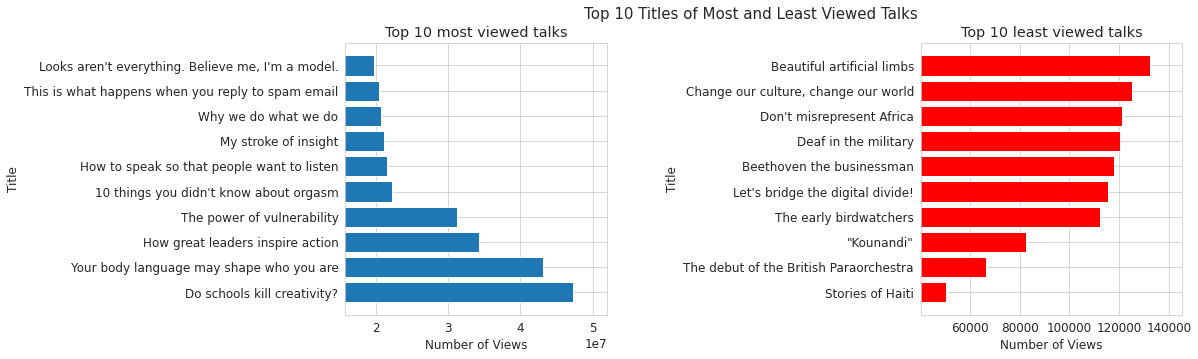

In [ ]:
# Get the number of views of top 10 most viewed talks [1, 1347, 678, 838, 453, 1777, 202, 6, 2115, 1417]
top10_pos_views = df.sort_values(by = 'views', ascending=False).head(10)['views']
# Get the title of top 10 most viewed talks accordingly
title_top10_pos_views = df.sort_values(by = 'views', ascending=False).head(10)['title']

# Get the number of views of top 10 least viewed talks [595, 1113, 238, 777, 1134, 1230, 1142, 1080, 1105, 1179]
top10_neg_views = df.sort_values(by = 'views', ascending=True).head(10)['views']
# Get the title of top 10 least viewed talks accordingly
title_top10_neg_views = df.sort_values(by = 'views', ascending=True).head(10)['title']

# Plot
fig, ax = plt.subplots(1, 2, figsize = (15,5))
fig.suptitle("Top 10 Titles of Most and Least Viewed Talks", fontsize=15)

# Top 10 most viewed talks
ax[0].barh(title_top10_pos_views, top10_pos_views)
ax[0].set(xlim = [min(top10_pos_views)* 0.8, max(top10_pos_views)* 1.1],
          xlabel = 'Number of Views',
          ylabel = 'Title',
          title = 'Top 10 most viewed talks')

# Top 10 least viewed talks
ax[1].barh(title_top10_neg_views, top10_neg_views, color='r')
ax[1].set(xlim = [min(top10_neg_views)* 0.8, max(top10_neg_views)* 1.1],
          xlabel = 'Number of Views',
          ylabel = 'Title',
          title = 'Top 10 least viewed talks')


plt.subplots_adjust(wspace = 1.2)

plt.show()

# top10.plot(kind='barh')

In [ ]:
df[df['title'] == 'The debut of the British Paraorchestra']

,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,views,comments,tags,languages,ratings,event_category
ID,,,,,,,,,,,,,,,
1113,The debut of the British Paraorchestra,There are millions of prodigiously gifted musi...,"Charles Hazlewood, British Paraorchestra",contemporary music ensemble,2,816,TEDxBrussels,1321920000,1326641089,66668,43,"['TEDx', 'disability', 'entertainment', 'globa...",0,"[{'id': 10, 'name': 'Inspiring', 'count': 105}...",TEDx


**Observations**

* Ken Robinson's talk on *Do Schools Kill Creativity?* is the most popular TED Talk of all time with 47.2 million views.
* Also coincidentally, it is also one of the first talks to ever be uploaded on the TED Site (the main dataset is sorted by published date).
* Robinson's talk is closely followed by Amy Cuddy's talk on *Your Body Language May Shape Who You Are.*

On the contrary:
* *Stories of Haiti* has the least views, as we can see that the film date was in 2004, but it was later published on TED in 2010. At the same time, the talk was really long considering the duration factor. This might be the reason why there were so few views because the topic is quite out-dated.
* The British Paraorchestra, based in Bristol, is an orchestra consisting entirely of musicians with disabilities—the first ever orchestra of its kind in the United Kingdom. This could be the reason why not many people have heard about it and therefore the views were much lower.

Finally, in this section, let us investigate the summary statistics and the distibution of the views garnered on various TED Talks.

In [ ]:
df['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

The average number of views on TED Talks in 1.6 million, and the median number of views is 1.12 million. This suggests a very high average level of popularity of TED Talks. We also notice that the majority of talks have views less than 4 million. We will consider this as the cutoff point when constructing box plots in the later sections.

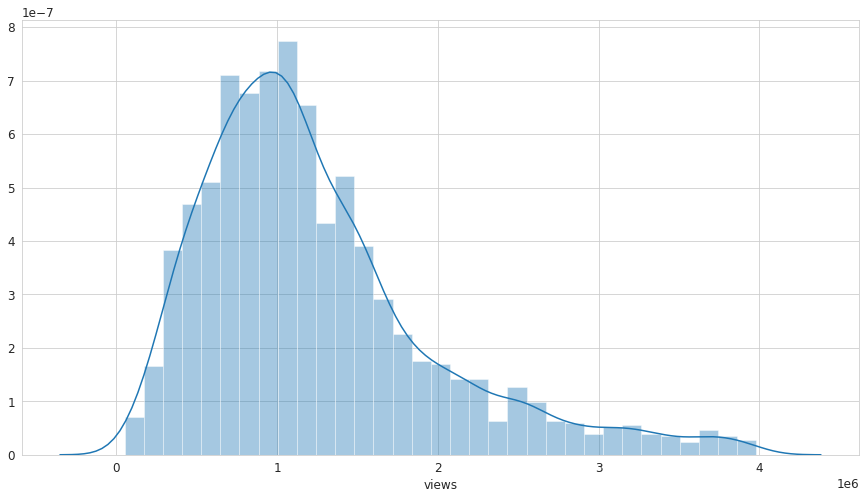

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15,8))
ax= sns.distplot(df[df['views'] <= 4e6]['views'])

plt.show()

**KEY Takeaway**


### Which talks provoke the most online discussion?

Next, we would also see top 10 talks with most and least comments. 

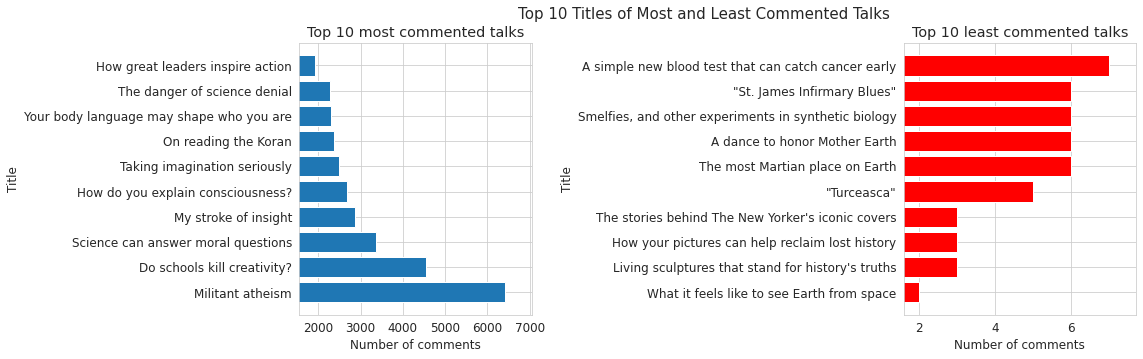

In [ ]:
# Get the number of comments of top 10 most commented talks [97, 1, 645, 202, 1788, 955, 841, 1347, 662, 678]
top10_poscmt = df.sort_values(by = 'comments', ascending=False).head(10)['comments']
# Get the title of top 10 most commented talks accordingly
title_top10_pos = df.sort_values(by = 'comments', ascending=False).head(10)['title']

# Get the number of comments of top 10 least commented talks [2535, 2543, 2529, 2502, 2408, 2547, 2508, 2393, 2314, 2495]
top10_negcmt = df.sort_values(by = 'comments', ascending=True).head(10)['comments']
# Get the title of top 10 least commented talks accordingly
title_top10_neg = df.sort_values(by = 'comments', ascending=True).head(10)['title']

# Plot
fig, ax = plt.subplots(1, 2, figsize = (15,5))
fig.suptitle("Top 10 Titles of Most and Least Commented Talks", fontsize=15)

# Top 10 most commented talks
ax[0].barh(title_top10_pos, top10_poscmt)
ax[0].set(xlim = [min(top10_poscmt)* 0.8, max(top10_poscmt)* 1.1],
          xlabel = 'Number of comments',
          ylabel = 'Title',
          title = 'Top 10 most commented talks')

# Top 10 least commented talks
ax[1].barh(title_top10_neg, top10_negcmt, color='r')
ax[1].set(xlim = [min(top10_negcmt)* 0.8, max(top10_negcmt)* 1.1],
          xlabel = 'Number of comments',
          ylabel = 'Title',
          title = 'Top 10 least commented talks')

plt.subplots_adjust(wspace = 1.6)

plt.show()

Many media platform such as Youtuber encourages creators to publish videos that maximize engagement. Needless to say, comments are a strong indicator that people are engaging with a video.

But does TED Talk use comments as a ranking signal?

Our data suggests that they do:

### Which event has the most talks?

Before we move into analyzing top events with most talks, we would like to briefly show you the distribution of talks in different events so you can gain some basic understanding about our dataset.

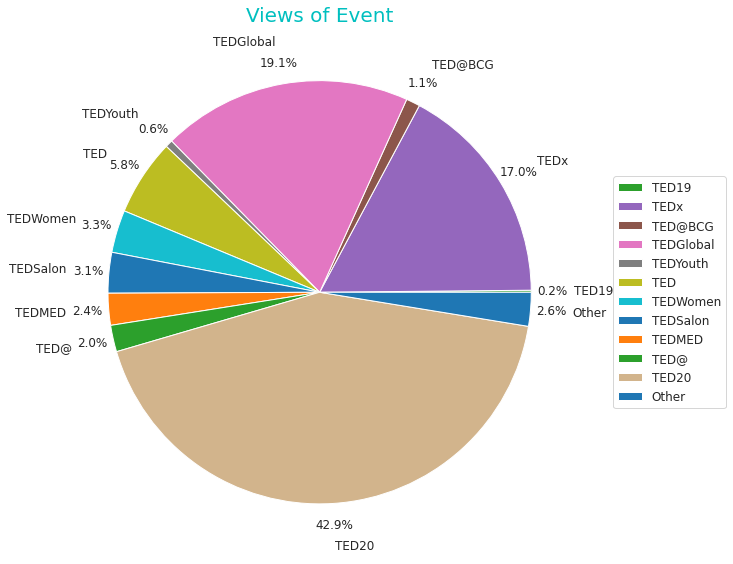

In [ ]:
sum_20 = df[df['event_category']=='TED20']['views'].sum()
sum_x = df[df['event_category']=='TEDx']['views'].sum()
sum_Glo = df[df['event_category']=='TEDGlobal']['views'].sum()
sum_TED = df[df['event_category']=='TED']['views'].sum()
sum_Oth = df[df['event_category']=='Other']['views'].sum()
sum_Wo = df[df['event_category']=='TEDWomen']['views'].sum()
sum_Sa = df[df['event_category']=='TEDSalon']['views'].sum()
sum_MED = df[df['event_category']=='TEDMED']['views'].sum()
sum_ac = df[df['event_category']=='TED@']['views'].sum()
sum_BCG = df[df['event_category']=='TED@BCG']['views'].sum()
sum_Youth = df[df['event_category']=='TEDYouth']['views'].sum()
sum_19 = df[df['event_category']=='TED19']['views'].sum()
cols = ['C22', 'C4', 'C5', 'C6','C7','C8','C9','C10', 'C11', 'C12','tan','C0']


labels = ['TED19', 'TEDx', 'TED@BCG', 'TEDGlobal', 'TEDYouth', 'TED', 'TEDWomen', 'TEDSalon', 'TEDMED', 'TED@', 'TED20','Other']
sum_views = [sum_19, sum_x, sum_BCG, sum_Glo, sum_Youth, sum_TED, sum_Wo, sum_Sa, sum_MED, sum_ac, sum_20, sum_Oth]

# Plot
fig, ax = plt.subplots(figsize = (10,8)) 
plt.axis("equal")
ax.pie(sum_views, labels=labels, colors=cols, autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.2)

ax.legend(loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Views of Event',fontsize=20, color = 'c')
plt.tight_layout()

plt.show()

Firstly we will start by finding the top 5 event categories from the 12 categories that were previously classified:
- TED20
- TEDx
- TEDGlobal
- TED
- Other
- TEDWomen
- TEDSalon
- TEDMED
- TED@
- TED@BCG
- TEDYouth
- TED19

In [ ]:
top5_event = df['event_category'].value_counts().head(5)
top5_data = df[df['event_category'].isin(top5_event.index)]
top5_data

,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,views,comments,tags,languages,ratings,event_category
ID,,,,,,,,,,,,,,,
1,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,"author, educator",1,1164,TED2006,2006-02-25,2006-06-27,47227110,4553,"[children, creativity, culture, dance, educati...",60,"{'Funny': 19645, 'Beautiful': 4573, 'Ingenious...",TED20
2,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,climate advocate,1,977,TED2006,2006-02-25,2006-06-27,3200520,265,"[alternative energy, cars, climate change, cul...",43,"{'Funny': 544, 'Courageous': 139, 'Confusing':...",TED20
3,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,technology columnist,1,1286,TED2006,2006-02-24,2006-06-27,1636292,124,"[computers, entertainment, interface design, m...",26,"{'Funny': 964, 'Courageous': 45, 'Ingenious': ...",TED20
4,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,activist for environmental justice,1,1116,TED2006,2006-02-26,2006-06-27,1697550,200,"[MacArthur grant, activism, business, cities, ...",35,"{'Courageous': 760, 'Beautiful': 291, 'Confusi...",TED20
5,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,"global health expert, data visionary",1,1190,TED2006,2006-02-22,2006-06-27,12005869,593,"[Africa, Asia, Google, demo, economics, global...",48,"{'Ingenious': 3202, 'Funny': 1390, 'Beautiful'...",TED20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,What we're missing in the debate about immigra...,"Between 2008 and 2016, the United States depor...",Duarte Geraldino,journalist,1,476,TED2017,2017-06-06,2017-09-19,450430,17,"[TED Residency, United States, community, fami...",4,"{'Courageous': 24, 'Informative': 33, 'Inspiri...",TED20
2547,The most Martian place on Earth,How can you study Mars without a spaceship? He...,Armando Azua-Bustos,astrobiologist,1,290,TED2017,2017-04-24,2017-09-20,417470,6,"[Mars, South America, TED Fellows, astrobiolog...",3,"{'Fascinating': 32, 'Informative': 38, 'Inspir...",TED20
2548,What intelligent machines can learn from a sch...,Science fiction visions of the future show us ...,Radhika Nagpal,robotics engineer,1,651,TED2017,2017-04-24,2017-09-21,375647,10,"[AI, ants, fish, future, innovation, insects, ...",1,"{'Beautiful': 14, 'Informative': 32, 'Ingeniou...",TED20


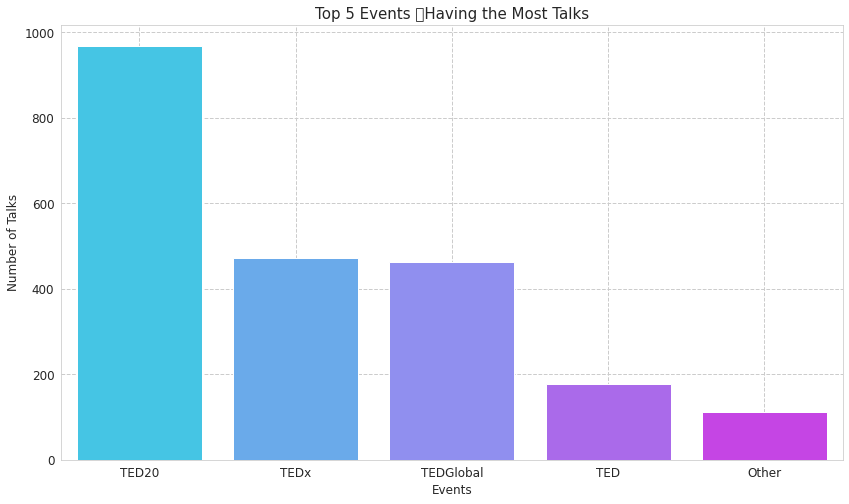

In [ ]:
colors = sns.color_palette('colorblind')
plt.figure(figsize=(14,8))
sns.barplot(top5_event.index,top5_event.values, palette="cool")
plt.xlabel('Events')
plt.ylabel('Number of Talks')
plt.title('Top 5 Events Having the Most Talks', fontsize = 15)
plt.grid(True, linewidth= 1, linestyle="--")

plt.show()

Next, in order to deeply analyze the top 5 event categories in TED talk, we need more matrix to make the right analysis. Because there are a lot of projects, we are not sure whether the categories are really popular, or just simply because the number of events in some categories are more than others.
This would be misleading because in recent years the number of people who have access to internet increased and people are more open to the concept of online learning, therefore if we make a comparision simply based on the year such as TED2000s, the result will be biased.

Therefore we would check other metrix to see what we can analyze.

In [ ]:
# Sort the data top5_groupby according to the order of top5_event
top5_groupby = top5_data.groupby('event_category').sum().loc[top5_event.index]
top5_groupby

,num_speaker,duration,views,comments,languages
TED20,1006,790134,1857510338,204972,27756
TEDx,481,393606,737772767,86109,11528
TEDGlobal,468,382351,826196106,99095,13592
TED,189,129718,252253752,23805,4593
Other,111,129792,111590768,19345,2112


Our hypothesis was correct, the number of TED20 events is much higher compared to other categories. And as more and more people build a habit to watch TED, we understand that more language settings will be provided accordingly to serve different target audience.

As a result, we are curious to find out the average duration that a speaker can give a talk in these event categories.

In [ ]:
top5_groupby['avg_duration'] = top5_groupby['duration'] / top5_groupby['num_speaker']
top5_groupby

,num_speaker,duration,views,comments,languages,avg_duration
TED20,1006,790134,1857510338,204972,27756,785.421471
TEDx,481,393606,737772767,86109,11528,818.307692
TEDGlobal,468,382351,826196106,99095,13592,816.989316
TED,189,129718,252253752,23805,4593,686.338624
Other,111,129792,111590768,19345,2112,1169.297297


Here the duration of the talk is counted in seconds. We then visualize our result for better understanding.

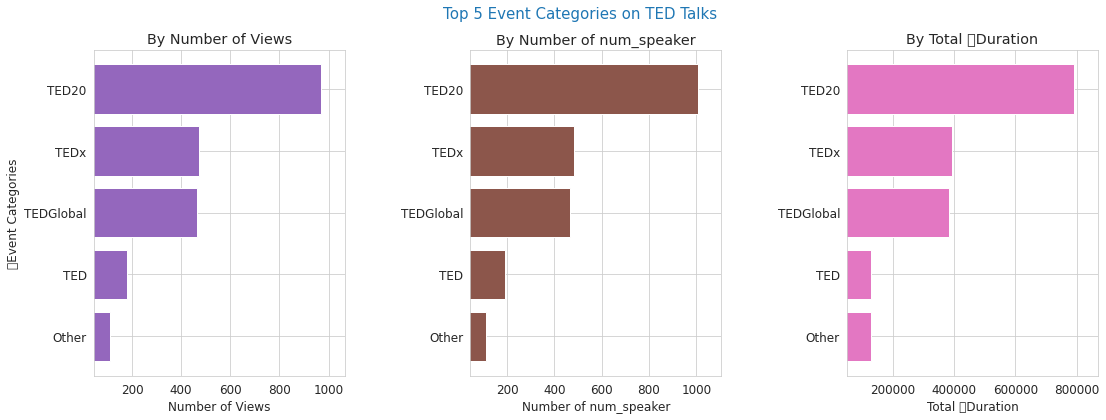

In [ ]:
# Reverse the sorting order
top5_event = top5_event[::-1]
top5_groupby = top5_groupby[::-1]

# Plot
fig, ax = plt.subplots(1, 3, figsize = (18,6))
fig.suptitle("Top 5 Event Categories on TED Talks", fontsize = 15, color='C0')

# Top 5 Categories by number of views
ax[0].barh(top5_event.index, top5_event.values, color='C4')
ax[0].set(xlim = [min(top5_event.values)* 0.4, max(top5_event.values)* 1.1],
          xlabel = 'Number of Views',
          ylabel = 'Event Categories',
          title = 'By Number of Views')

# Number of speakers of top 5 categories
ax[1].barh(top5_groupby.index, top5_groupby['num_speaker'].values, color='C5')
ax[1].set(xlim = [min(top5_groupby['num_speaker'].values)* 0.4, max(top5_groupby['num_speaker'].values)* 1.1],
          xlabel = 'Number of num_speaker',
          
          title = 'By Number of num_speaker')

# Total duration of top 5 categories
ax[2].barh(top5_groupby.index, top5_groupby['duration'].values, color='C6')
ax[2].set(xlim = [min(top5_groupby['duration'].values)* 0.4, max(top5_groupby['duration'].values)* 1.1],
          xlabel = 'Total Duration',
          
          title = 'By Total Duration')

# Adjust the space between subplots
plt.subplots_adjust(wspace = 0.5)

plt.show()

From the chart above, it is clear that most event categories follow the same pattern, as there are more views, there are more number of speakers and the duration would also be longer. There is no significant or noticeable abnormality to report about the categories. But we do find it interesting that on average, one TED talk tends to last around 13 minutes, while other talks (Other category) seem to last much longer.

As we have seen the top 5 TED events, we thought it would be interesting to analyze the number of views by months in those events to see which months are best to hold events like TED talks. 

We will pick the top 3 most viewed events to focus our analysis, these include TED20, TEDx, TEDGlobal.

In [ ]:
# Get data views by months in TED20, TEDx, TEDGlobal

df20=df[df['event_category']=='TED20']
df20['month_pub'] = df20['published_date'].dt.month
df20_views = df20[['views','month_pub']]
df20_v = df20_views['month_pub'].value_counts()

dfx = df[df['event_category']=='TEDx']
dfx['month_pub'] = dfx['published_date'].dt.month
dfx_views = dfx[['views','month_pub']]
dfx_v = dfx_views['month_pub'].value_counts()

dfGlo = df[df['event_category']=='TEDGlobal']
dfGlo['month_pub'] = dfGlo['published_date'].dt.month
dfGlo_views = dfGlo[['views','month_pub']]
dfGlo_v = dfGlo_views['month_pub'].value_counts()


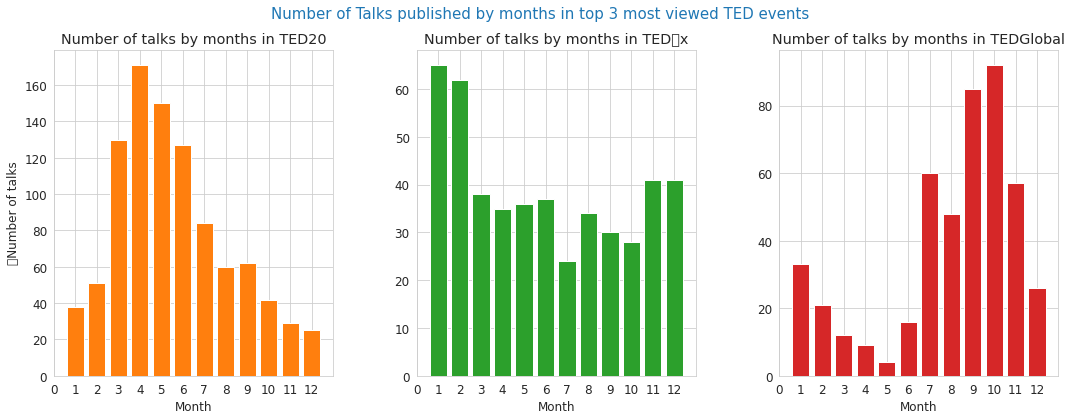

In [ ]:
# Plot
fig, ax = plt.subplots(1, 3, figsize = (18,6))
fig.suptitle("Number of Talks published by months in top 3 most viewed TED events", fontsize = 15, color='C0')

ax[0].bar(df20_v.index,df20_v.values, color='C1')
ax[0].set(xticks = range(13),
          xlabel = 'Month',
          ylabel = 'Number of talks',
          title = 'Number of talks by months in TED20')

ax[1].bar(dfx_v.index, dfx_v.values, color='C2')
ax[1].set(xticks = range(13),
          xlabel = 'Month',
          title = 'Number of talks by months in TEDx')

ax[2].bar(dfGlo_v.index, dfGlo_v.values, color='C3')
ax[2].set(xticks = range(13),
          xlabel = 'Month',
          title = 'Number of talks by months in TEDGlobal')

# Adjust the space between subplots
plt.subplots_adjust(wspace = 0.3)

plt.show()

It can be seen that TED Talks have year-round events distributed evenly in different periods. TEDx have been scheduled all over the world and TEDx events have evolved over time since 2015, therefore the number of talks here is distributed much more evenly than other events. While TEDGlobal events seem to be held at the end of the year, TED20 events are taking place in the beginning and middle of the year.

### Measuring Ratings: Which descriptors are most rated by the viewers?

#### First impression:
As we were able to make a dictionary of each rating(descriptor) with their count respectively, we then need a quantitative definition of a talk's rating. In the data set, ratings are split into various qualitative descriptions. Based on the meaning of these 14 descriptors, we categorize these as positive:

- Funny
- Courageous
- Beautiful
- Informative
- Inspiring
- Fascinating
- Ingenious
- Persuasive
- Jaw-dropping

And the rest are considered as negative:

- Confusing
- Unconvincing
- Longwinded
- Obnoxious
- OK

#### Our hypothesis:
It is noticable that there are more positive rating option and negative rating option, which could lead to huge bias. 
Secondly, TED's rating system allows each viewer to choose up to three of these descriptors per video. If they choose only one, their rating will be counted three times. This leads to an interesting hypothesis: the number of descriptors one would choose to describe a video does not necessarily correlate with the strength of their opinion. 

Let us graph the frequency of each qualitative rating, with the positive descriptors in blue and negative ones in red.

In [ ]:
# Create a list of dictionary for all rating descriptors
rating_lst = df['ratings'].tolist()
rating_lst[1]

{'Beautiful': 58,
 'Confusing': 62,
 'Courageous': 139,
 'Fascinating': 132,
 'Funny': 544,
 'Informative': 443,
 'Ingenious': 56,
 'Inspiring': 413,
 'Jaw-dropping': 116,
 'Longwinded': 113,
 'OK': 203,
 'Obnoxious': 131,
 'Persuasive': 268,
 'Unconvincing': 258}

In [ ]:
# Count all the ratings in 2550 talks
counter = {}

for d in rating_lst: 
    for k in d.keys(): 
        counter[k] = counter.get(k, 0) + d[k] 
      
counter

{'Beautiful': 490349,
 'Confusing': 53436,
 'Courageous': 420045,
 'Fascinating': 801119,
 'Funny': 393895,
 'Informative': 887434,
 'Ingenious': 384386,
 'Inspiring': 1352048,
 'Jaw-dropping': 377547,
 'Longwinded': 83344,
 'OK': 207157,
 'Obnoxious': 66303,
 'Persuasive': 561220,
 'Unconvincing': 134558}

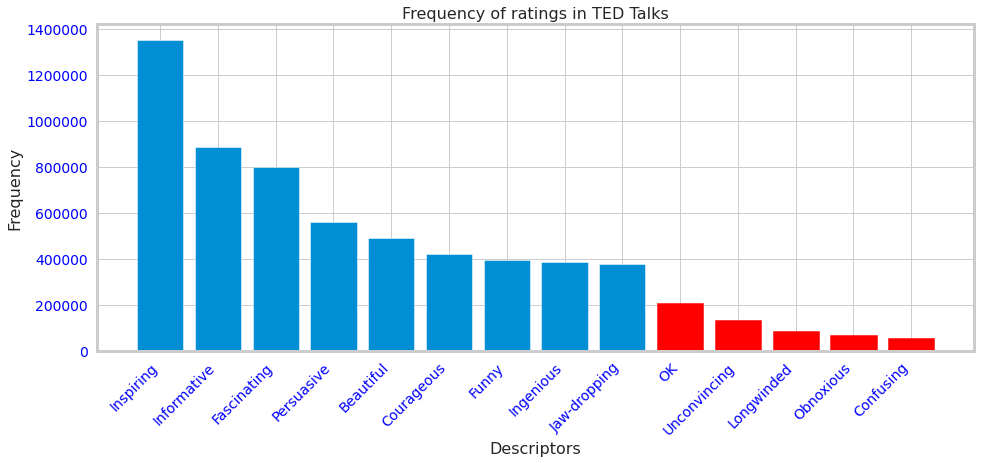

In [ ]:
frequency = list(counter.values())
descriptor = list(counter.keys())

# Zip each frequency and descriptor accordingly
# Then sort the list in descending orders with negative descriptors at the end
descriptor_list = [x for _,x in sorted(zip(frequency,descriptor), reverse=True)]

# Pre-define the list of negative descriptors
neg_descriptors = {"Confusing", "Longwinded", "Obnoxious", "OK", "Unconvincing"}

# Get the index of negative descriptors in the list of all descriptors : [4, 5, 8, 11, 12]
neg_indices  = [x for x in range(len(descriptor_list)) if descriptor_list[x] in neg_descriptors]

# Sort rating frequency list in descending orders
frequency.sort(reverse=True)

# Plot
fig,ax = plt.subplots()
indices = np.arange(len(descriptor_list))
plot_data = ax.bar(indices, frequency)
[plot_data[i].set_color('r') for i in neg_indices]
plt.xticks(indices, descriptor_list, rotation=45, ha="right", fontsize = 14)
ax.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
ax.tick_params(direction='out', length=6, width=2, colors='b')
plt.yticks(fontsize = 14)
plt.title("Frequency of ratings in TED Talks", fontsize=16)
plt.xlabel("Descriptors", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
# plt.yticks()
fig.set_size_inches(14, 6, forward=True)
plt.show()

Our hypothesis was correct: there is a significant bias towards positive ratings. In addition to the rating options available, we may attribute this to the quality of the TED Talks, or the tendency of the average TED viewer to leave positive feedback over negative feedback. Regardless, we must consider this when analyzing the results.
What's next: We will define a measure of aggregate ratings as the sum of some descriptions and the difference of some others. From there on, we can find the correlation between languages and ratings, views and ratings, and between comments and ratings.

### Measuring Tags: Which are the most viewed topics?
Now, we will look at what the idea is about.
Some ideas: visualize the growth of different topics by the years.

### What factors need to be considered to have a successful talk?

In previous sections, we have looked at the correlation between ranking factors — like views and comments — with TED rankings.

It might be misleading to think that talks with those titles might lead to few views and comments. But if we can look at the topics of the talks, the time it was published and other metrix, we can make 3 hypothesis:
- The most viewed and commented talks are those that were held from 2000s because more people have accessed to internet.
- The most viewed and commented talks have topics that are not scientifically sophisticated compared to the most and least commented talks.
- The least viewed and commented talks might include some performance and art shows, which were inclusive to some specific target audience and were not relatable to most TED viewers.

We then want to find the talks that appear in both findings of most viewed and commented talks. 

It appears that the least commented and viewed talks have no same title, and therefore we would analyze them separately as to why they have low views based on their tags. (*This part will be done later*)

In [ ]:
# Find the indices of most viewed and commented talks
same_pos_indices = []
for i, row1 in top10_poscmt.iteritems(): 
  for j, row2 in top10_pos_views.iteritems():
    if i == j:
      same_pos_indices.append(i) 
same_pos_indices

[1, 202, 1347, 678]